In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.neighbors import DistanceMetric
from math import radians

# Junho


 Faltam os dias 3, 4, 5, 6, 12, 19, 26, 27

In [3]:
junho = pd.read_csv('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/passengers_junho.csv',
                    index_col= 'Unnamed: 0')

    #  Sao 214k linhas

In [4]:
junho

,device_id,timestampI,timestampF,MAC,RSSI,channel,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,id,duration
0,617.0,1622529842,1622529920,40:06:a0:5b:8c:b2,-45,11,-22.827145,-47.061214,-22.829490,-47.060281,40,0,78
1,617.0,1622529842,1622529920,0c:ef:af:d3:00:36,-65,11,-22.827145,-47.061214,-22.829490,-47.060281,15,1,78
2,617.0,1622529847,1622529875,24:fd:0d:bd:91:49,-67,6,-22.826890,-47.061367,-22.826994,-47.061368,3,2,28
3,617.0,1622529850,1622529850,0e:ec:8d:d0:6d:0d,-90,7,-22.826730,-47.061454,-22.826730,-47.061454,2,3,0
4,617.0,1622529856,1622529856,0a:cc:27:40:31:3c,-87,4,-22.826406,-47.061626,-22.826406,-47.061626,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214541,NaN,1625079190,1625079190,22:ae:9f:77:09:55,-85,1,-22.816560,-47.072811,-22.816560,-47.072811,1,524,0
214542,NaN,1625079193,1625079196,50:92:b9:3b:a7:2a,-91,11,-22.816561,-47.072812,-22.816566,-47.072808,3,525,3
214543,NaN,1625079121,1625079121,ae:30:5e:57:df:56,-88,6,-22.816467,-47.072852,-22.816467,-47.072852,1,512,0
214544,NaN,1625079196,1625079196,28:16:7f:bc:c4:42,-93,6,-22.816566,-47.072808,-22.816566,-47.072808,1,526,0



## Preparacao dos dados

In [5]:
junho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214546 entries, 0 to 214545
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   device_id   106336 non-null  float64
 1   timestampI  214546 non-null  int64  
 2   timestampF  214546 non-null  int64  
 3   MAC         214546 non-null  object 
 4   RSSI        214546 non-null  int64  
 5   channel     214546 non-null  int64  
 6   latitudeI   214546 non-null  float64
 7   longitudeI  214546 non-null  float64
 8   latitudeF   214546 non-null  float64
 9   longitudeF  214546 non-null  float64
 10  cnt_pckg    214546 non-null  int64  
 11  id          214546 non-null  int64  
 12  duration    214546 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 22.9+ MB


In [6]:
## Tranforma timestamp em datas

junho['dataInicio'] = pd.to_datetime(junho['timestampI'], unit='s')
junho['dataFim'] = pd.to_datetime(junho['timestampF'], unit='s')

In [7]:
junho = junho[['MAC','latitudeI', 'longitudeI', 'latitudeF', 'longitudeF', 'cnt_pckg', 'duration', 'dataInicio', 'dataFim']]

In [8]:
## Cria a coluna com o dia de cada ping para os agrupamentos

junho['day'] = junho.dataInicio.dt.day

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_1587/1329112363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['day'] = junho.dataInicio.dt.day


In [74]:
junho[ junho.dataInicio.dt.day  !=  junho.dataFim.dt.day ]

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,duration(s),distance(m),velMed(km/h)
21,40:06:a0:5b:8c:b2,-22.955734,-47.009000,-22.829826,-47.059970,87,43888,2021-06-01 18:05:54,2021-06-02 06:17:22,1,0,22,43888.0,14932.844173,1.224896
57,40:06:a0:5b:8c:b2,-22.954490,-47.008907,-22.829795,-47.059993,162,42727,2021-06-07 18:16:44,2021-06-08 06:08:51,7,0,18,42727.0,14810.818936,1.247898
77,40:06:a0:5b:8c:b2,-22.954458,-47.008953,-22.829859,-47.059943,28,43267,2021-06-08 18:16:48,2021-06-09 06:17:55,8,0,20,43267.0,14797.368644,1.231205
97,40:06:a0:5b:8c:b2,-22.974315,-47.004052,-22.830034,-47.059838,245,43846,2021-06-09 18:03:47,2021-06-10 06:14:33,9,0,20,43846.0,17019.845989,1.397424
116,40:06:a0:5b:8c:b2,-22.920297,-47.012116,-22.830044,-47.059826,28,44337,2021-06-10 17:52:03,2021-06-11 06:11:00,10,0,19,44337.0,11155.705789,0.905802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186865,6e:39:1a:b4:9e:a2,-22.954487,-47.008552,-22.954531,-47.008978,14,42128,2021-06-20 16:55:51,2021-06-21 04:37:59,20,50666,1,42128.0,43.864093,0.003748
186870,38:a6:59:22:65:18,-22.954481,-47.008926,-22.954491,-47.008952,168,40800,2021-06-16 18:32:44,2021-06-17 05:52:44,16,50671,1,40800.0,2.883221,0.000254
186871,38:a6:59:22:65:18,-22.954795,-47.008520,-22.954519,-47.008947,51,40890,2021-06-20 16:55:45,2021-06-21 04:17:15,20,50671,1,40890.0,53.383144,0.004700
196139,1e:d6:c7:63:ba:d5,-22.954442,-47.008931,-22.954482,-47.008885,22,45435,2021-06-20 17:06:56,2021-06-21 05:44:11,20,58797,1,45435.0,6.474082,0.000513


In [9]:
## Cria coluna de ID para cada um dos MACS para facilitar identificacao

MACs_unicos = junho.MAC.unique()

temp = defaultdict(lambda: len(temp))
device_id = [temp[ele] for ele in MACs_unicos]

res = dict(zip(MACs_unicos, device_id))

junho['device_id'] = junho['MAC'].map(res)
junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_1587/48684942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['device_id'] = junho['MAC'].map(res)


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0
1,0c:ef:af:d3:00:36,-22.827145,-47.061214,-22.829490,-47.060281,15,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,1
2,24:fd:0d:bd:91:49,-22.826890,-47.061367,-22.826994,-47.061368,3,28,2021-06-01 06:44:07,2021-06-01 06:44:35,1,2
3,0e:ec:8d:d0:6d:0d,-22.826730,-47.061454,-22.826730,-47.061454,2,0,2021-06-01 06:44:10,2021-06-01 06:44:10,1,3
4,0a:cc:27:40:31:3c,-22.826406,-47.061626,-22.826406,-47.061626,2,0,2021-06-01 06:44:16,2021-06-01 06:44:16,1,4
...,...,...,...,...,...,...,...,...,...,...,...
214541,22:ae:9f:77:09:55,-22.816560,-47.072811,-22.816560,-47.072811,1,0,2021-06-30 18:53:10,2021-06-30 18:53:10,30,75896
214542,50:92:b9:3b:a7:2a,-22.816561,-47.072812,-22.816566,-47.072808,3,3,2021-06-30 18:53:13,2021-06-30 18:53:16,30,11104
214543,ae:30:5e:57:df:56,-22.816467,-47.072852,-22.816467,-47.072852,1,0,2021-06-30 18:52:01,2021-06-30 18:52:01,30,75890
214544,28:16:7f:bc:c4:42,-22.816566,-47.072808,-22.816566,-47.072808,1,0,2021-06-30 18:53:16,2021-06-30 18:53:16,30,68306


In [10]:
## Adiciona sequence para identificar dentro de um dia de qual a o numero da conexao atual (em uma lista ordenada)

junho.sort_values(by= ['device_id', 'dataInicio'], inplace = True)

junho['sequence'] = junho.groupby(['device_id', 'day']).cumcount()+1

junho.reset_index(drop = True, inplace = True)

junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_1587/2411379021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho.sort_values(by= ['device_id', 'dataInicio'], inplace = True)
/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_1587/2411379021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['sequence'] = junho.groupby(['device_id', 'day']).cumcount()+1


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
214541,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75892,1
214542,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75893,1
214543,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75894,1
214544,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75895,1


In [11]:
## Criando coluna de duracao da conexao entre os pings

junho['duration(s)'] = (junho['dataFim'] - junho['dataInicio']).dt.total_seconds()

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_1587/2409393950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['duration(s)'] = (junho['dataFim'] - junho['dataInicio']).dt.total_seconds()


In [12]:
## funcao de calculo de distancia entre o ponto de inicio e fim da conexao

def haversine_vectorize(lon1, lat1, lon2, lat2):
    # print(lon1, lat1, lon2, lat2)
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    m = 6_367_000 * dist #6367 for distance in KM for miles use 3958
    return m

junho['distance(m)'] = junho.apply(lambda x : haversine_vectorize(x['longitudeI'], x['latitudeI'], x['longitudeF'], x['latitudeF']), axis = 1)

junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_1587/2860964263.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['distance(m)'] = junho.apply(lambda x : haversine_vectorize(x['longitudeI'], x['latitudeI'], x['longitudeF'], x['latitudeF']), axis = 1)


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,duration(s),distance(m)
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,78.0,277.556780
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2,37.0,223.305248
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3,0.0,0.000000
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,78.0,301.803700
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5,37.0,224.782093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214541,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75892,1,0.0,0.000000
214542,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75893,1,3.0,0.604525
214543,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75894,1,0.0,0.000000
214544,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75895,1,0.0,0.000000


In [13]:
## Coluna de velocidade media para avalicao se os movimentos sao coerentes

junho['velMed(km/h)'] = junho['distance(m)']/junho['duration(s)'] *3.6
junho

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,duration(s),distance(m),velMed(km/h)
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,78.0,277.556780,12.810313
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2,37.0,223.305248,21.726997
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3,0.0,0.000000,NaN
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,78.0,301.803700,13.929402
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5,37.0,224.782093,21.870690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214541,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75892,1,0.0,0.000000,NaN
214542,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75893,1,3.0,0.604525,0.725430
214543,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75894,1,0.0,0.000000,NaN
214544,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75895,1,0.0,0.000000,NaN


In [76]:
junho.loc[(junho['MAC'] == "40:06:a0:5b:8c:b2")   & (junho['day']== 1) ]

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,duration(s),distance(m),velMed(km/h)
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,78.0,277.556780,12.810313
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2,37.0,223.305248,21.726997
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3,0.0,0.000000,NaN
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,78.0,301.803700,13.929402
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5,37.0,224.782093,21.870690
5,40:06:a0:5b:8c:b2,-22.827116,-47.061166,-22.829648,-47.060414,38,78,2021-06-01 09:06:10,2021-06-01 09:07:28,1,0,6,78.0,291.719974,13.463999
6,40:06:a0:5b:8c:b2,-22.827030,-47.061240,-22.829614,-47.060350,30,78,2021-06-01 11:10:03,2021-06-01 11:11:21,1,0,7,78.0,301.268520,13.904701
7,40:06:a0:5b:8c:b2,-22.828242,-47.066670,-22.828242,-47.066670,1,0,2021-06-01 11:13:08,2021-06-01 11:13:08,1,0,8,0.0,0.000000,NaN
8,40:06:a0:5b:8c:b2,-22.827211,-47.061172,-22.829681,-47.060513,63,81,2021-06-01 11:57:21,2021-06-01 11:58:42,1,0,9,81.0,282.655887,12.562484
9,40:06:a0:5b:8c:b2,-22.825315,-47.066428,-22.825315,-47.066428,1,0,2021-06-01 12:01:39,2021-06-01 12:01:39,1,0,10,0.0,0.000000,NaN


In [78]:
junho.loc[(junho['day']== 1) ]['MAC'].value_counts().plot()

40:06:a0:5b:8c:b2    22
0c:ef:af:d3:00:36    18
e0:10:7f:ad:dd:68    14
0e:ef:af:02:54:4a    14
09:00:80:00:72:1a    14
                     ..
72:ed:c7:26:f5:ce     1
20:a1:71:a9:6d:43     1
a8:16:d0:63:84:77     1
04:d3:95:2b:1b:7f     1
90:73:5a:63:d8:14     1
Name: MAC, Length: 4681, dtype: int64

## Agrupamentio dos usuarios por dias contando numero de conexoes

Aqui pode haver mais coisas a se fazer

Como eh possivel ver no caso do dia=1 device=0
 - a data de inicio eh no dia 1, e a data fim eh no dia 2
 - isso nao acontece pra todos os devices, mas para os que acontecem pode ser retrabalhado

In [14]:
junho_group = junho.groupby(['day','device_id']).agg({
                                                        'dataInicio': 'min',
                                                        'dataFim':'max',
                                                        'sequence':'count',
                                                        'distance(m)':'sum',
                                                        'duration(s)':'sum'
})
junho_group

dataInicio             dataFim  sequence   distance(m)  \
day device_id                                                                   
1   0         2021-06-01 06:44:02 2021-06-02 06:17:22        22  20384.500122   
    1         2021-06-01 06:44:02 2021-06-02 06:17:22        18  18542.257166   
    2         2021-06-01 06:44:07 2021-06-01 16:43:12        11    501.274556   
    3         2021-06-01 06:44:10 2021-06-01 06:44:10         1      0.000000   
    4         2021-06-01 06:44:16 2021-06-01 06:44:16         1      0.000000   
...                           ...                 ...       ...           ...   
30  75892     2021-06-30 18:52:56 2021-06-30 18:52:56         1      0.000000   
    75893     2021-06-30 18:52:59 2021-06-30 18:53:02         1      0.604525   
    75894     2021-06-30 18:53:06 2021-06-30 18:53:06         1      0.000000   
    75895     2021-06-30 18:53:09 2021-06-30 18:53:09         1      0.000000   
    75896     2021-06-30 18:53:10 2021-06-30 18:53:10         1      0.000000   

               duration(s)  
day device_id               
1   0              49016.0  
    1              48158.0  
    2               1060.0  
    3                  0.0  
    4                  0.0  
...                    ...  
30  75892              0.0  
    75893              3.0  
    75894              0.0  
    75895              0.0  
    75896              0.0  

[122526 rows x 5 columns]

#### Recuperando a primeira e ultima coordenada

 - Usando o usuario/MAC e o primeiro e ultimo momento em conexao
 - Buscar as coordenadas desses dispositivos nesse instante (inicial e final)
 - Comparar com a coordenada dos pontos de onibus para determinar qual o ponto de embarque do passageiro e ponto de desembarque

In [15]:
junho_coordenadas = junho_group.merge(junho[['day','device_id', 'dataInicio', 'latitudeI', 'longitudeI']],  
                                        right_on= ['day', 'device_id', 'dataInicio'], 
                                        left_on=  ['day','device_id', 'dataInicio']).merge(
                                            junho[['day','device_id', 'dataFim', 'latitudeF', 'longitudeF']],  
                                            right_on= ['day', 'device_id', 'dataFim'], 
                                            left_on=  ['day','device_id', 'dataFim'])
junho_coordenadas

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
0,1,0,2021-06-01 06:44:02,2021-06-02 06:17:22,22,20384.500122,49016.0,-22.827145,-47.061214,-22.829826,-47.059970
1,1,1,2021-06-01 06:44:02,2021-06-02 06:17:22,18,18542.257166,48158.0,-22.827145,-47.061214,-22.829826,-47.059970
2,1,2,2021-06-01 06:44:07,2021-06-01 16:43:12,11,501.274556,1060.0,-22.826890,-47.061367,-22.827011,-47.061384
3,1,3,2021-06-01 06:44:10,2021-06-01 06:44:10,1,0.000000,0.0,-22.826730,-47.061454,-22.826730,-47.061454
4,1,4,2021-06-01 06:44:16,2021-06-01 06:44:16,1,0.000000,0.0,-22.826406,-47.061626,-22.826406,-47.061626
...,...,...,...,...,...,...,...,...,...,...,...
123226,30,75892,2021-06-30 18:52:56,2021-06-30 18:52:56,1,0.000000,0.0,-22.816555,-47.072823,-22.816555,-47.072823
123227,30,75893,2021-06-30 18:52:59,2021-06-30 18:53:02,1,0.604525,3.0,-22.816558,-47.072823,-22.816554,-47.072819
123228,30,75894,2021-06-30 18:53:06,2021-06-30 18:53:06,1,0.000000,0.0,-22.816561,-47.072818,-22.816561,-47.072818
123229,30,75895,2021-06-30 18:53:09,2021-06-30 18:53:09,1,0.000000,0.0,-22.816560,-47.072812,-22.816560,-47.072812


## Selecao de passageiros validos

#### Histograma Duration 
    - entre um minuto e uma hora de viagem
    - pelo menos 300m percorridos

Conclusao: Concentracao viagens de curta ducarao (ate 10 minutos)

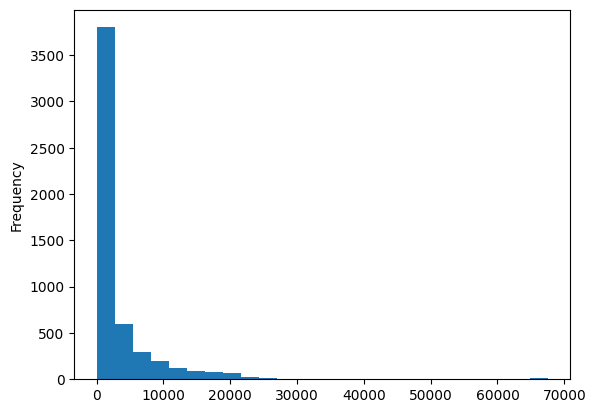

In [16]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].plot(kind='hist', bins = 25);

##### Casos para corte dos passageiros validos

- Ha casos em que a duracao conexao de um passageiro eh superior a 47000 segundos (12h)
    - isso ocorre para passageiros que usam a linha diariamente
    - assim a dataInicio ocorre no fim de um dia e a dataFim no inicio de outro
- Com isso deve-se faze rum corte para retirar essas anomalia

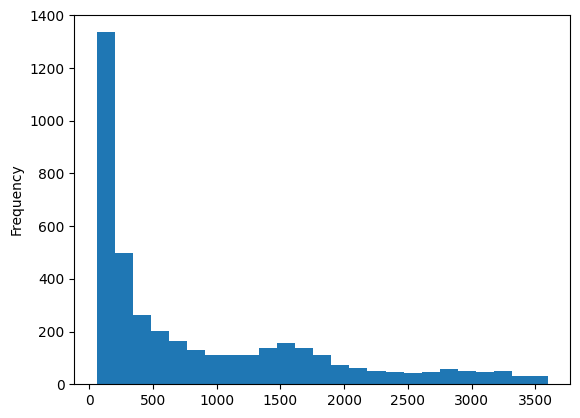

In [17]:
junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].plot(kind='hist', bins = 25);

#### Histograma Distance 
    - entre um minuto e uma hora de viagem
    - pelo menos 300m percorridos

##### Conclusao: Absoluta concentracao viagens de curta ducarao (ate 10 minutos)

    - 95% percentil de viagens é de 2km
    - Sao 230 viagens com mais de 2km, razoavel retirar sujeira

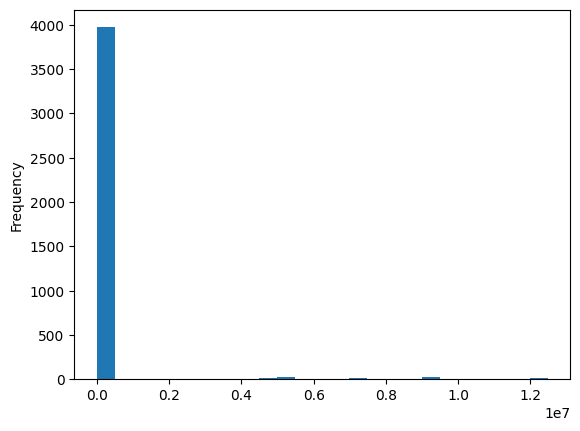

In [18]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'distance(m)'].plot(kind='hist', bins = 25);

In [19]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'distance(m)'].describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])
# sao 4030

count    4.066000e+03
mean     1.596414e+05
std      1.131259e+06
min      3.000165e+02
25%      4.261115e+02
50%      6.060513e+02
75%      9.625919e+02
80%      1.101657e+03
85%      1.282900e+03
90%      1.578465e+03
95%      2.141612e+03
max      1.248289e+07
Name: distance(m), dtype: float64

In [20]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 2000   )  ) ]

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
14,1,14,2021-06-01 07:58:19,2021-06-01 18:10:06,10,2.316922e+03,2644.0,-22.826920,-47.061282,-22.813783,-47.070272
143,1,143,2021-06-01 07:38:07,2021-06-01 19:09:18,13,2.003826e+03,2336.0,-22.825901,-47.067447,-22.827559,-47.067233
168,1,168,2021-06-01 07:38:59,2021-06-01 07:43:08,1,5.073419e+06,249.0,-22.829313,-47.065591,22.825704,-47.066347
219,1,219,2021-06-01 07:41:22,2021-06-01 17:03:53,3,2.376850e+03,830.0,-22.829499,-47.063892,-22.831503,-47.063166
382,1,382,2021-06-01 07:51:01,2021-06-01 19:22:27,14,3.006724e+03,1775.0,-22.813717,-47.060353,-22.815985,-47.062549
...,...,...,...,...,...,...,...,...,...,...,...
119526,30,400,2021-06-30 09:27:48,2021-06-30 17:18:56,7,5.071291e+06,234.0,-22.814552,-47.057213,-22.814391,-47.058259
119677,30,801,2021-06-30 09:06:08,2021-06-30 14:30:28,4,2.225460e+03,2284.0,-22.816233,-47.072673,-22.816320,-47.072668
119756,30,1103,2021-06-30 07:49:07,2021-06-30 17:19:23,9,5.071677e+06,638.0,-22.814323,-47.058529,-22.813752,-47.059717
120511,30,10848,2021-06-30 07:35:25,2021-06-30 18:41:20,11,5.073102e+06,3578.0,-22.824826,-47.065397,-22.825081,-47.065882


In [21]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 2000   )  ), 'distance(m)'].describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])
# sao 4030

count    2.320000e+02
mean     2.786193e+06
std      3.895166e+06
min      2.002638e+03
25%      2.330310e+03
50%      2.964286e+03
75%      5.072819e+06
80%      5.708661e+06
85%      7.209660e+06
90%      9.434119e+06
95%      9.438754e+06
max      1.248289e+07
Name: distance(m), dtype: float64

### Passageiros Validos

Foi adotado a duracao das viagens entre 60s e 1h

e com distancia percorrida entre 300m e 2,125km



In [22]:
validas_junho = junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300  ) & (  junho_coordenadas['distance(m)'] < 2125   )  )]
validas_junho

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
2,1,2,2021-06-01 06:44:07,2021-06-01 16:43:12,11,501.274556,1060.0,-22.826890,-47.061367,-22.827011,-47.061384
7,1,7,2021-06-01 06:44:48,2021-06-01 16:43:41,13,1948.024919,980.0,-22.827616,-47.061038,-22.828920,-47.060559
8,1,8,2021-06-01 06:45:04,2021-06-01 19:10:52,13,641.915961,557.0,-22.828743,-47.060651,-22.831784,-47.062191
10,1,10,2021-06-01 07:12:06,2021-06-01 17:05:16,11,1132.347947,2870.0,-22.828233,-47.060820,-22.829695,-47.061042
15,1,15,2021-06-01 07:58:19,2021-06-01 16:43:50,5,326.362801,714.0,-22.826920,-47.061282,-22.829299,-47.060340
...,...,...,...,...,...,...,...,...,...,...,...
122613,30,75285,2021-06-30 16:11:02,2021-06-30 17:53:25,3,979.980528,2187.0,-22.816324,-47.072736,-22.829452,-47.065457
122627,30,75299,2021-06-30 16:15:30,2021-06-30 16:40:28,1,816.956971,1498.0,-22.821159,-47.067949,-22.815148,-47.072541
122663,30,75335,2021-06-30 16:21:45,2021-06-30 16:26:48,1,1053.092650,303.0,-22.829544,-47.062912,-22.822227,-47.069446
122693,30,75365,2021-06-30 16:24:24,2021-06-30 16:26:33,1,434.662165,129.0,-22.825440,-47.065998,-22.822692,-47.069018


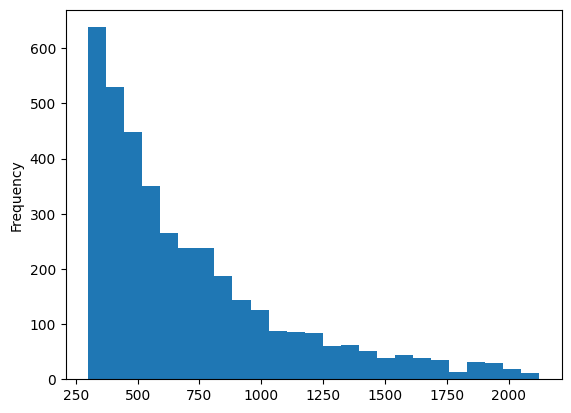

In [23]:
validas_junho['distance(m)'].plot(kind='hist', bins = 25);

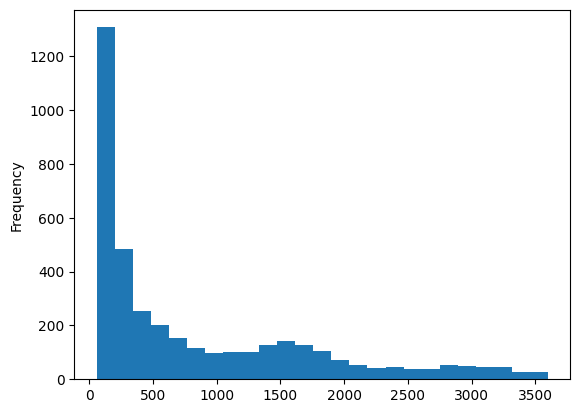

In [24]:
validas_junho['duration(s)'].plot(kind='hist', bins = 25);

In [25]:
# validas_junho.to_excel('viagens_validas_junho.xlsx', engine = 'openpyxl')

In [41]:
validas_junho.loc[((validas_junho['dataFim'] - validas_junho['dataInicio']).dt.total_seconds()  < validas_junho['duration(s)'])]

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
3405,1,3377,2021-06-01 16:55:57,2021-06-01 17:07:13,2,303.055976,704.0,-22.820093,-47.068095,-22.821291,-47.067707
3511,1,3471,2021-06-01 17:02:20,2021-06-01 17:03:42,2,694.551135,85.0,-22.825866,-47.067298,-22.831111,-47.063831
8208,2,6756,2021-06-02 12:01:28,2021-06-02 12:16:42,2,1921.591283,1048.0,-22.819988,-47.071689,-22.828654,-47.066177
9008,2,7552,2021-06-02 12:52:28,2021-06-02 12:57:09,2,791.104710,335.0,-22.825449,-47.066558,-22.830910,-47.064019
14211,7,7882,2021-06-07 11:10:26,2021-06-07 11:20:49,2,408.777586,631.0,-22.821247,-47.067869,-22.824732,-47.067302
15995,7,12575,2021-06-07 11:11:06,2021-06-07 11:32:23,2,1579.267114,2554.0,-22.829173,-47.060447,-22.825828,-47.067249
15996,7,12575,2021-06-07 11:11:06,2021-06-07 11:32:23,2,1579.267114,2554.0,-22.829173,-47.060447,-22.825828,-47.067249
15997,7,12575,2021-06-07 11:11:06,2021-06-07 11:32:23,2,1579.267114,2554.0,-22.829173,-47.060447,-22.825828,-47.067249
15998,7,12575,2021-06-07 11:11:06,2021-06-07 11:32:23,2,1579.267114,2554.0,-22.829173,-47.060447,-22.825828,-47.067249
17067,7,13607,2021-06-07 12:39:01,2021-06-07 12:56:43,2,369.292476,2124.0,-22.825736,-47.066508,-22.827076,-47.067574


junho

junho.drop(axis = 1, labels= ['ID_VIAGEM'], inplace = True)

validas_junho['ID_VIAGEM'] = validas_junho['device_id'].astype('str') + '_' +  validas_junho['dataInicio'].dt.day.astype('str') + '_' + validas_junho['dataInicio'].dt.month.astype('str')
validas_junho['ID_VIAGEM'] 

validas_junho

- com o agrupado temos os pontos de onibus de chegada e saida
- 
- 

## validas_junho

In [33]:
validas_junho.groupby(pd.Grouper(key='dataInicio', freq='1h')).agg(   {
                                                                          'sequence':'count'
}    )#.plot(kind='bar');

,sequence
dataInicio,
2021-06-01 06:00:00,3
2021-06-01 07:00:00,51
2021-06-01 08:00:00,0
2021-06-01 09:00:00,26
2021-06-01 10:00:00,0
...,...
2021-06-30 14:00:00,3
2021-06-30 15:00:00,0
2021-06-30 16:00:00,9


## Continuacao

- com os pontos de chegada e saida das viagens validas 
- agrupar os pontos por intervalo de tempo (aqui vai ficar a parametrizacao)
- dai para cara intervalo horario vamos ter uma tabela esparsa de origem destino

    
    - para intervalo de 1h (6h as 18h)
        - para um dia sao 12 matrizes OD
        - para um mes sao 360 matrizes OD



    
    - para o intervalo de 2h (6h as 18h)
        - para um dia sao 6 matrizes OD
        - para um mes sao 180 matrizes OD



    
    - para intervalo de 30min (6h as 18h)
        - para um dia sao 24 matrizes OD
        - para um mes sao 720 matrizes OD


# Analises diversas

In [61]:
junho

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,duration(s),distance(m),velMed(km/h)
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,78.0,277.556780,12.810313
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2,37.0,223.305248,21.726997
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3,0.0,0.000000,NaN
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,78.0,301.803700,13.929402
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5,37.0,224.782093,21.870690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214541,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75892,1,0.0,0.000000,NaN
214542,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75893,1,3.0,0.604525,0.725430
214543,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75894,1,0.0,0.000000,NaN
214544,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75895,1,0.0,0.000000,NaN


In [ ]:
junho.loc[(junho['device_id'] == 6)   & (junho['day'] == 1) ]

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,duration(s),distance(m),velMed(km/h)
616,8c:e5:c0:af:1e:a0,-22.827503,-47.061097,-22.827735,-47.060975,50,4,2021-06-01 06:44:46,2021-06-01 06:44:50,1,6,1,4.0,28.649547,25.784592
617,8c:e5:c0:af:1e:a0,-22.816354,-47.072731,-22.816331,-47.072650,15,69,2021-06-01 18:59:59,2021-06-01 19:01:08,1,6,2,69.0,8.681573,0.452952


In [ ]:
junho_group.reset_index(inplace=True)
junho_group.loc[(junho_group['device_id'] == 2)   & (junho_group['day'] == 1) ]

,level_0,index,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s)
2,2,2,1,2,2021-06-01 06:44:07,2021-06-01 16:43:12,11,501.274556,1060.0


In [72]:
junho.loc[ (junho['day'] == 1) , 'device_id'].value_counts().describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])

count    4681.000000
mean        1.693228
std         1.995373
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
80%         2.000000
85%         2.000000
90%         3.000000
95%         6.000000
max        22.000000
Name: device_id, dtype: float64

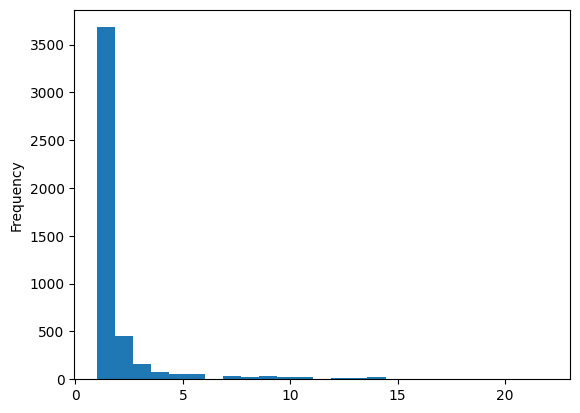

In [70]:
### para um dia
junho.loc[ (junho['day'] == 1) , 'device_id'].value_counts().plot(kind='hist', bins = 25);
